#  Lab 1



feedback:
- Good practice to add comments. 
- Q3, Q4, Q6 : When you choose to apply gridsearchCV, you can go ahead and fit to X_train_val directly. The question is set up to use a classic train/val/test split, which is why we write that you should evaluate on the val data. GridsearchCV, which does internal splits, would need the X_train_val data. Otherwise your are not using the train data at alL. Overall, good job

##  Hand-Written Digit Recognition

In [43]:
import numpy as np
import pandas as df

from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score # For evaluating model performance

# Hyperparameters
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


<h1>Import Digits Data</h1>

In [20]:
from sklearn import datasets, metrics
from sklearn.datasets import load_digits
digits = load_digits()

<h1>See what they look like</h1>

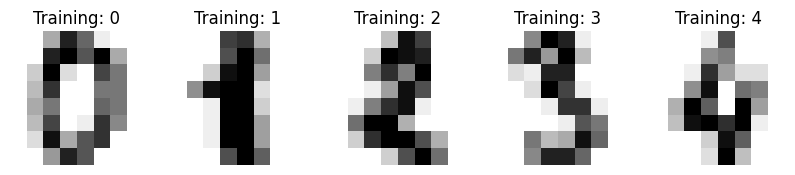

In [21]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0 - Dummy Classifier</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [22]:
# Creating the features vector X and the target vector y.

# Target vector
y = digits.target

# Features matrix
X = digits.data

X.shape

(1797, 64)

In [23]:
# Creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
# Defining dummy classifier for the digits data with strategy of 'most_frequent'

dummy_clf = DummyClassifier(strategy="most_frequent")

# Fitting the model to the training data
dummy_clf.fit(X_train, y_train)

# Predicting y
y_dummy_clf_pred = dummy_clf.predict(X_test)

In [25]:
# Reporting scores on training and testing set 
print("---------- Scores ----------")
print("Accuracy-score on training set: {:.3f}".format(dummy_clf.score(X_train, y_train)))
print("Accuracy-score on test set: {:.3f}\n".format(dummy_clf.score(X_test, y_test)))

---------- Scores ----------
Accuracy-score on training set: 0.106
Accuracy-score on test set: 0.084



<h1>Question 1 - Logistic Regression</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [27]:
# Building initial Logistic Regression Model - all parameters not specified are set to their defaults
logr = LogisticRegression(
    max_iter=10000, 
    random_state = 0,
    multi_class='auto'
    )

# Train - Fitting the model to training set
logr = logr.fit(X_train, y_train)




In [29]:
# Predict target values (y) for new data in test set
y_logr_pred = logr.predict(X_test)

# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(logr.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(logr.score(X_test, y_test)))

# print('Precision-score %.3f' % precision_score(y_test, y_logr_pred))
# print('Recall-score %.3f' % recall_score(y_test, y_logr_pred))

Accuracy on training set: 1.000
Accuracy on testing set: 0.953



In [30]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_logr_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [31]:
# In the first step we will split the data in training-validation set - 20% test, 80% train
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [32]:
# In the next step we will split the training-validation set into train and val
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.2, random_state=0)

<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

In [33]:
# Applying RandomizedSearchCV for hyperparameter optimization for C

# Model
logreg = LogisticRegression()

# parameter grid
parameters = {
    'C'       : [0.001, 0.01, 0.1, 1.0],
}

# using GridSearchCV
logr_tuned = GridSearchCV(logreg,             # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # cross-validation

# Fitting model with optimized parameters using train-val data
logr_tuned.fit(X_trainval,y_trainval)

# Identifying the most optimal hyperparameters
logr_tuned.best_params_

{'C': 0.01}

In [34]:
# Tuning model with optimized hyperparameters 
logr_tuned = LogisticRegression(C = 0.01, max_iter=10000)

# Train - Fitting model using the combined train and val data
logr_tuned.fit(X_trainval, y_trainval)

# Predict y using test set
y_logr_pred = logr_tuned.predict(X_test)

In [35]:
# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(logr_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(logr_tuned.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on testing set: 0.961



In [36]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_logr_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.91      0.91        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.95      0.92      0.94        39
           9       0.93      0.95      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.91      0.91        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.95      0.92      0.94        39
           9       0.93      0.95      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



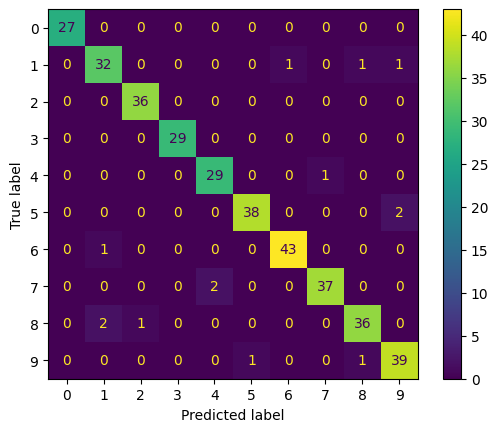

In [39]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_logr_pred)
print(metrics.classification_report(y_test, y_logr_pred))

<h1>Question 4 - Decision Tree Classifier</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [44]:
# Applying GridSearchCV for hyperparameter optimization for max depth

# Model
dtree = DecisionTreeClassifier()

depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # Returns array with values between 1 and 20

# parameter grid
parameters = {
    'max_depth'       : depth,
}

# using GridSearchCV
dtree_tuned = GridSearchCV(dtree,             # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # cross-validation

# Fitting model with optimized parameters using validation data
dtree_tuned.fit(X_val,y_val)

# Identifying the most optimal hyperparameters
dtree_tuned.best_params_

{'max_depth': 13}

<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


In [45]:
# Tuning model with optimized hyperparameters 
dtree_tuned = DecisionTreeClassifier(max_depth=13)

# Train - Fitting model using the combined train and val data
dtree_tuned.fit(X_trainval, y_trainval)

# Predict y using test set
y_dtree_pred = dtree_tuned.predict(X_test)

In [46]:
# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(dtree_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(dtree_tuned.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.875



In [48]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_dtree_pred, digits=2))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.86      0.89      0.87        35
           2       0.91      0.89      0.90        36
           3       0.73      0.93      0.82        29
           4       0.93      0.87      0.90        30
           5       0.88      0.88      0.88        40
           6       0.93      0.93      0.93        44
           7       0.93      0.97      0.95        39
           8       0.93      0.72      0.81        39
           9       0.80      0.80      0.80        41

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.87       360



              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.86      0.89      0.87        35
           2       0.91      0.89      0.90        36
           3       0.73      0.93      0.82        29
           4       0.93      0.87      0.90        30
           5       0.88      0.88      0.88        40
           6       0.93      0.93      0.93        44
           7       0.93      0.97      0.95        39
           8       0.93      0.72      0.81        39
           9       0.80      0.80      0.80        41

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.87       360



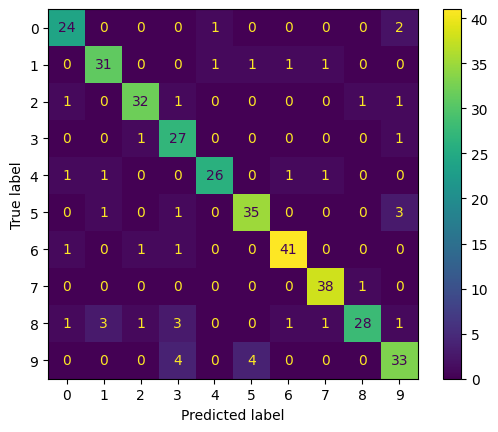

In [47]:
# Plotting confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_dtree_pred)
print(metrics.classification_report(y_test, y_dtree_pred))

<h1>Question 6 - Random Forest Classifier</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

In [57]:
# Applying GridSearchCV for hyperparameter optimization for n_estimators and max_depth

# Model
rf_clf = RandomForestClassifier()


# parameter grid
parameters = {
    'n_estimators'    : np.arange(50, 550, 50), # Number of trees in the forest
    'max_depth'       : np.arange(10, 60, 10),  # Max depth of each tree
}

# using GridSearchCV
rf_clf_tuned = GridSearchCV(rf_clf ,             # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # cross-validation

# Fitting model with optimized parameters using validation data
rf_clf_tuned.fit(X_val,y_val)

# Identifying the most optimal hyperparameters
rf_clf_tuned.best_params_


{'max_depth': 40, 'n_estimators': 300}

<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [59]:
# Tuning model with optimized hyperparameters 
rf_clf_tuned = RandomForestClassifier(n_estimators=300, max_depth=40)

# Train - Fitting model using the combined train and val data
rf_clf_tuned.fit(X_trainval, y_trainval)

# Predict y using test set
y_rf_clf_pred = rf_clf_tuned.predict(X_test)

In [60]:
# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(rf_clf_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(rf_clf_tuned.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.969



In [61]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_rf_clf_pred, digits=2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.92      1.00      0.96        35
           2       1.00      0.94      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.92      1.00      0.96        35
           2       1.00      0.94      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      0.98      0.99        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



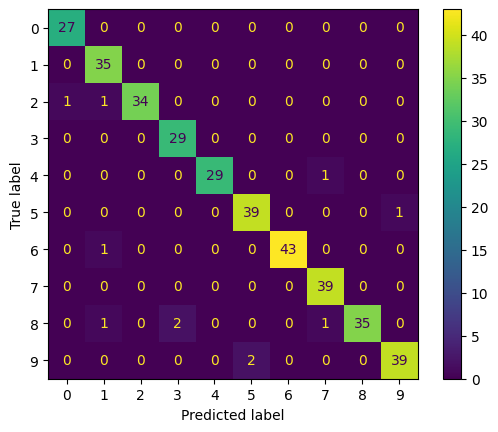

In [62]:
# Plotting confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_rf_clf_pred)
print(metrics.classification_report(y_test, y_rf_clf_pred))

# <h1>Question 8 - MLP Classifier</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

In [69]:
# Applying GridSearchCV for hyperparameter optimization for n_estimators and max_depth

# Model
mlp_clf = MLPClassifier(max_iter=1000)

# creating loops for hyperparameter values for hidden_layer_sizes from (10,10) to (210,210)
hls_values = []
for h1 in range(10, 210, 50):
    for h2 in range(10, 210, 50):
        hls = (h1,h2)
        hls_values.append(hls)

# parameter grid
parameters = {
    'hidden_layer_sizes'    : hls_values, 
}

# using GridSearchCV
mlp_clf_tuned = GridSearchCV(mlp_clf ,             # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # cross-validation

# Fitting model with optimized parameters using validation data
mlp_clf_tuned.fit(X_val,y_val)

# Identifying the most optimal hyperparameters
mlp_clf_tuned.best_params_


{'hidden_layer_sizes': (110, 110)}

<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [71]:
# Tuning model with optimized hyperparameters 
mlp_clf_tuned = MLPClassifier(hidden_layer_sizes=(110,110), max_iter=1000)

# Train - Fitting model using the combined train and val data
mlp_clf_tuned.fit(X_trainval, y_trainval)

# Predict y using test set
y_mlp_clf_pred = mlp_clf_tuned.predict(X_test)

In [72]:
# -- Classification report -- 
# Reporting scores on training and testing set 
print("Accuracy on training set: {:.3f}".format(mlp_clf_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(mlp_clf_tuned.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.981



In [73]:
# Print classification report after tuning hyperparameters
print(classification_report(y_test,y_mlp_clf_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.98        29
           4       0.94      1.00      0.97        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.95      0.97        39
           8       1.00      0.95      0.97        39
           9       0.98      0.98      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.98        29
           4       0.94      1.00      0.97        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.95      0.97        39
           8       1.00      0.95      0.97        39
           9       0.98      0.98      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



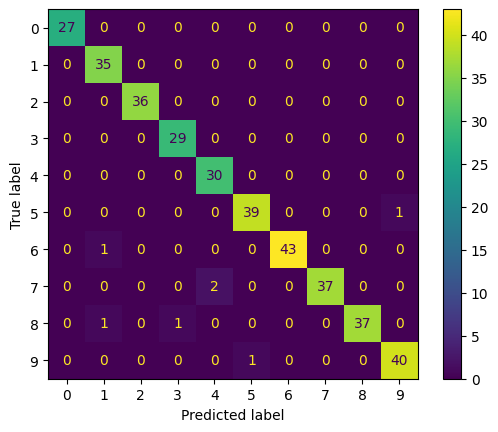

In [74]:
# Plotting confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_mlp_clf_pred)
print(metrics.classification_report(y_test, y_mlp_clf_pred))